# Minimal Surface Code

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


## Establishing functions for each plaquette

In this section, we create two function __XPlaq__ and __ZPlaq__, each function will generate a plaquette, we will then create a global function to generate a proper surface code with the proper topology.

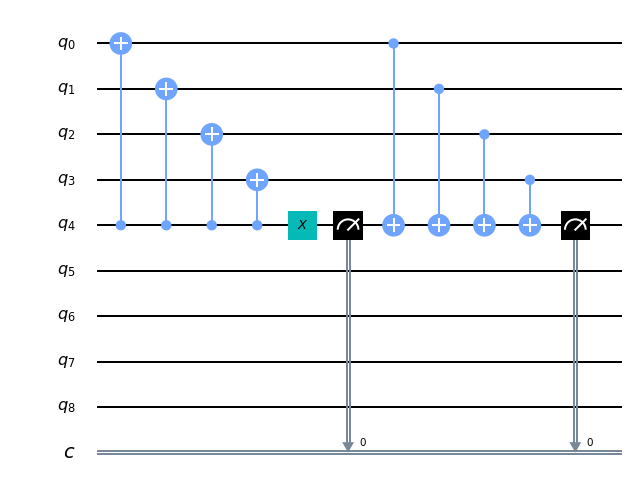

In [19]:
N_plaq = 1
N_qubit = 9
#X_plaquette
syndrome = 4

def X_Plaq(syndrome,q1,q2,q3,q4,Classical_Circuit,circ_plaqX,N_qubit,N_plaq):
    circ_plaqX = QuantumCircuit(N_qubit,N_plaq)
    circ_plaqX.cx(syndrome,q1)
    circ_plaqX.cx(syndrome,q2)
    circ_plaqX.cx(syndrome,q3)
    circ_plaqX.cx(syndrome,q4)
    circ_plaqX.x(syndrome)
    circ_plaqX.measure(syndrome,Classical_Circuit)
    return circ_plaqX
circ_plaqZ = QuantumCircuit(9,N_plaq)
#Z_plaquette
circ_plaqZ = QuantumCircuit(N_qubit,N_plaq)

def Z_Plaq(syndrome,q1,q2,q3,q4,Classical_Circuit,circ_plaqZ,N_qubit,N_plaq):
    circ_plaqZ = QuantumCircuit(N_qubit,N_plaq)
    circ_plaqZ.cx(q1,syndrome)
    circ_plaqZ.cx(q2,syndrome)
    circ_plaqZ.cx(q3,syndrome)
    circ_plaqZ.cx(q4,syndrome)
    circ_plaqZ.measure(syndrome,Classical_Circuit)
    return circ_plaqZ

#X_Plaq(syndrome,0,1,2,3,0,circ_plaqX1,9,N_plaq).draw()
a = X_Plaq(syndrome,0,1,2,3,0,circ_plaqZ,9,N_plaq) + Z_Plaq(syndrome,0,1,2,3,0,circ_plaqZ,9,N_plaq)
a.draw()

Now we want to create a code that can generate a surface code from the two plaquettes defined previously. This is a test version, I cannot add circuits properly if I use the same circuits in the function, it's a bit strange. I found why my function wasn't working, I just need to implement it now.

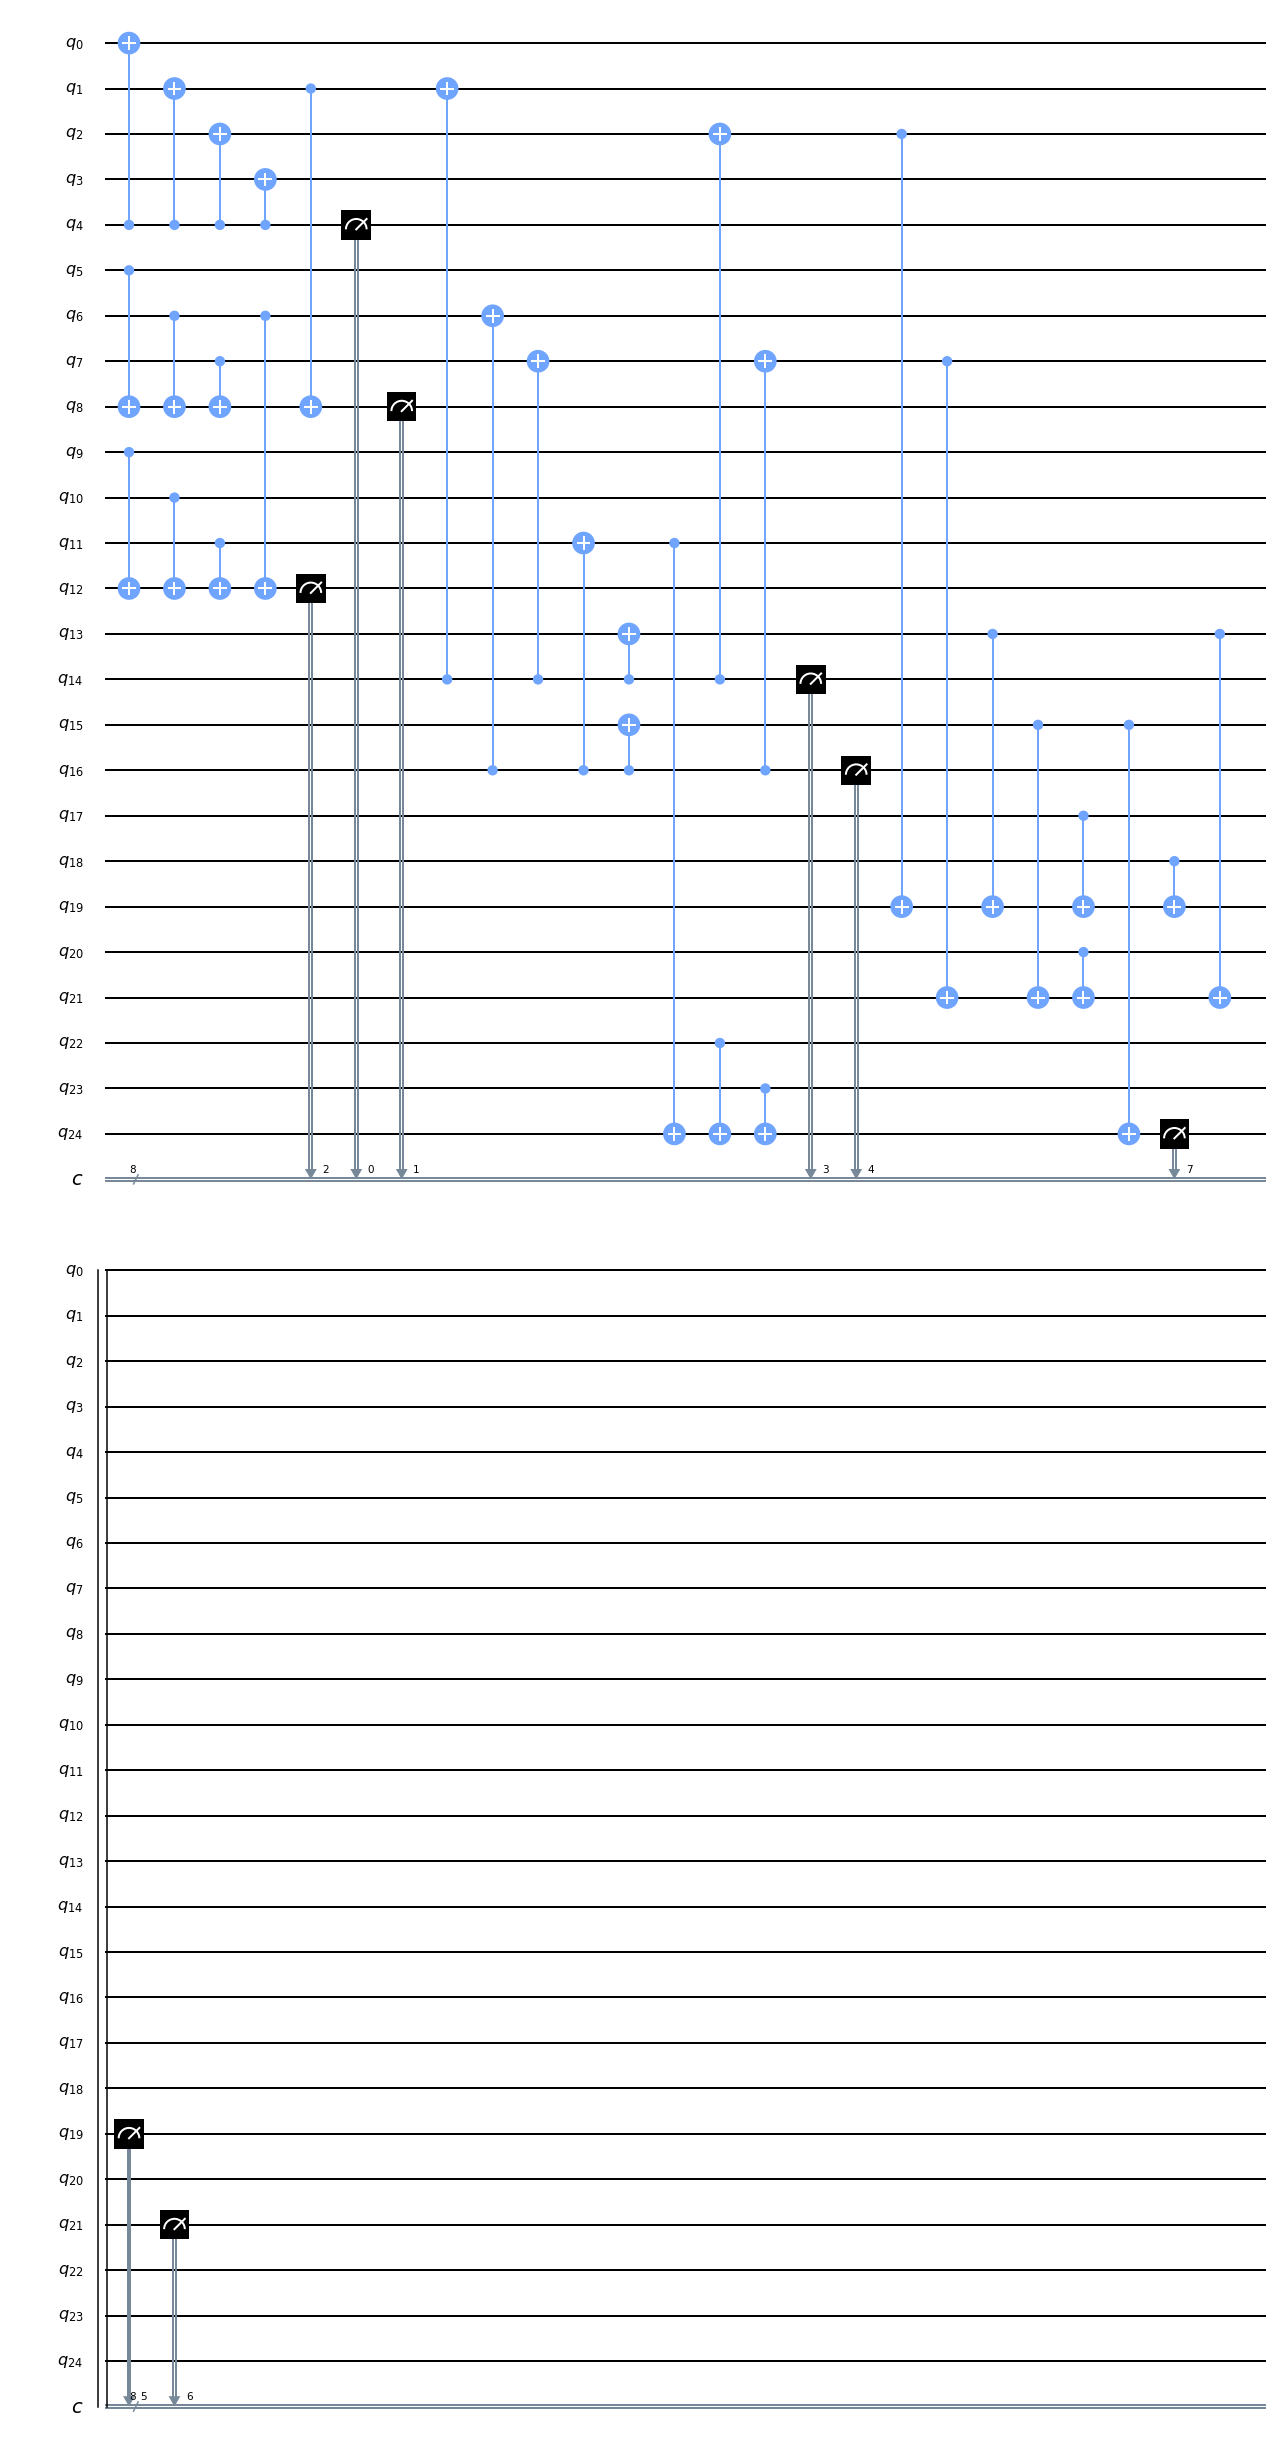

In [18]:
N_plaq = 8
N_qubit = 25
circ_plaqX = QuantumCircuit(N_qubit,N_plaq)
circ_plaqX1 = QuantumCircuit(N_qubit,N_plaq)
circ_plaqX2 = QuantumCircuit(N_qubit,N_plaq)
circ_plaqX3 = QuantumCircuit(N_qubit,N_plaq)
circ_plaqX4 = QuantumCircuit(N_qubit,N_plaq)
circ_plaqX5 = QuantumCircuit(N_qubit,N_plaq)

circ_plaqZ = QuantumCircuit(N_qubit,N_plaq)
circ_plaqZ1 = QuantumCircuit(N_qubit,N_plaq)


Surf = Z_Plaq(4,0,1,2,3,0,circ_plaqX,N_qubit) + X_Plaq(8,5,6,7,1,1,circ_plaqX,N_qubit) + X_Plaq(12,9,10,11,6,2,circ_plaqX2,N_qubit) + Z_Plaq(14,1,7,13,2,3,circ_plaqZ,N_qubit) + Z_Plaq(16,6,11,15,7,4,circ_plaqZ1,N_qubit) + X_Plaq(19,2,13,17,18,5,circ_plaqX3,N_qubit) + X_Plaq(21,7,15,20,13,6,circ_plaqX4,N_qubit) + X_Plaq(24,11,22,23,15,7,circ_plaqX5,N_qubit)                         
Surf.draw()

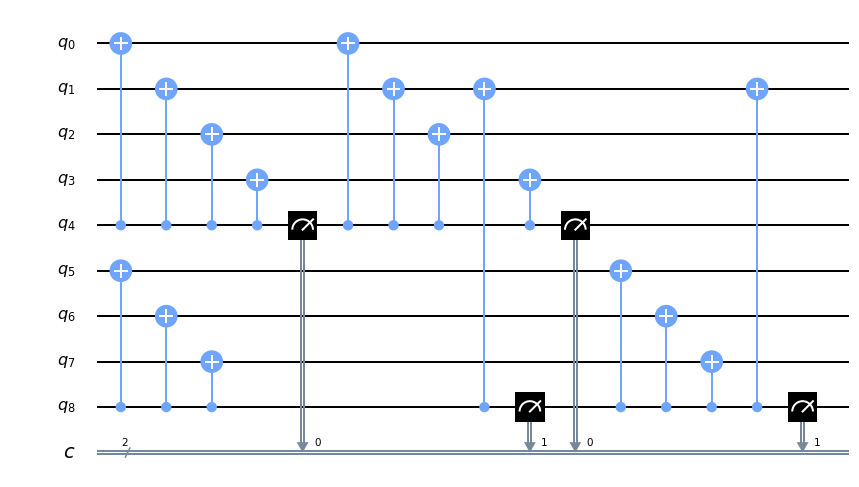

In [7]:
#Implement way to select number of rows and column, find a way as well to put artificial errors without modifying the function
circ = 0
def SurfaceCode(N_qubit,N_syndrome):
    zbl = 0
    zbl = QuantumCircuit(N_qubit+N_syndrome,N_syndrome)
    zbl = X_Plaq(4,0,1,2,3,0,circ_plaqZ) + X_Plaq(8,5,6,7,1,1,circ_plaqX1)
    return zbl
        
        

SurfaceCode(9,2).draw()

In [6]:
help(QuantumCircuit)

Help on class QuantumCircuit in module qiskit.circuit.quantumcircuit:

class QuantumCircuit(builtins.object)
 |  QuantumCircuit(*regs, name=None)
 |  
 |  Create a new circuit.
 |  
 |  A circuit is a list of instructions bound to some registers.
 |  
 |  Args:
 |      regs: list(:class:`Register`) or list(``int``) The registers to be
 |          included in the circuit.
 |  
 |              * If a list of :class:`Register` objects, represents the :class:`QuantumRegister`
 |                and/or :class:`ClassicalRegister` objects to include in the circuit.
 |  
 |              For example:
 |  
 |              * ``QuantumCircuit(QuantumRegister(4))``
 |              * ``QuantumCircuit(QuantumRegister(4), ClassicalRegister(3))``
 |              * ``QuantumCircuit(QuantumRegister(4, 'qr0'), QuantumRegister(2, 'qr1'))``
 |  
 |              * If a list of ``int``, the amount of qubits and/or classical
 |              bits to include in the circuit. It can either be a single
 |           

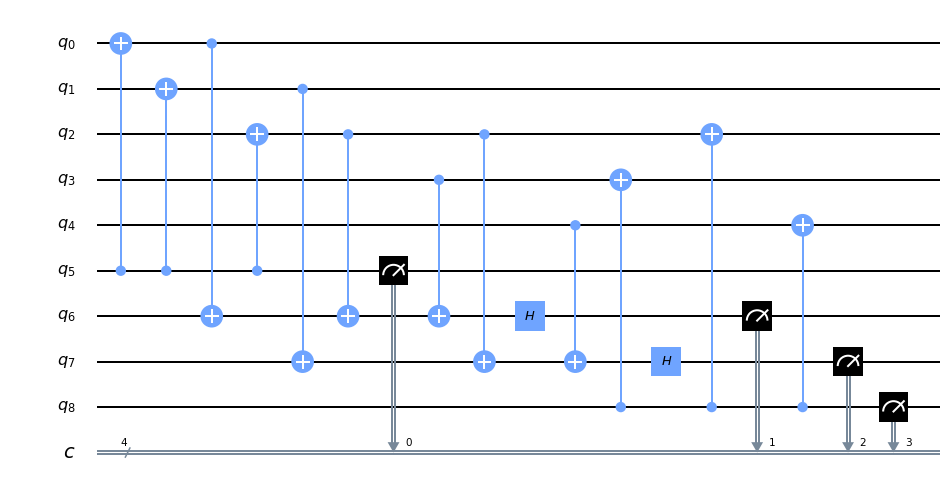

In [73]:
def Minsurf(q1,q2,q3,q4,q5,a1,a2,a3,a4):
    circ = QuantumCircuit(9,4)
    
    #You can put errors here
    #circ.x(q3)
    
    
    #The code
    #A1
    circ.cx(a1,q1)
    circ.cx(a1,q2)
    circ.cx(a1,q3)
    
    #A2
    circ.cx(q1,a2)
    circ.cx(q3,a2)
    circ.cx(q4,a2)
    circ.h(a2)
    
    #A3
    circ.cx(q2,a3)
    circ.cx(q3,a3)
    circ.cx(q5,a3)
    circ.h(a3)
    
    #A4
    circ.cx(a4,q4)
    circ.cx(a4,q3)
    circ.cx(a4,q5)
    
    #Measure
    circ.measure(a1,0)
    circ.measure(a2,1)
    circ.measure(a3,2)
    circ.measure(a4,3)
    
    return circ

Minsurf(0,1,2,3,4,5,6,7,8).draw()

In [74]:
qc = Minsurf(0,1,2,3,4,5,6,7,8)

backend_sim = Aer.get_backend('qasm_simulator')

shots = 2048
job_sim = execute(qc, backend_sim, shots=shots)

# Grab the results from the job.
result_sim = job_sim.result()

#The dictionary counts summarize all the possible output with the number of occurence per state.
counts = result_sim.get_counts(qc)
print(counts)

{'0010': 515, '0000': 508, '0110': 520, '0100': 505}


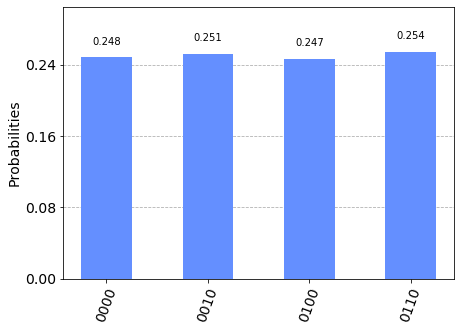

In [75]:
plot_histogram(counts)

In [76]:
#This code doesn't in account the real geometry of the system
N_qubit = 17
qubits = range(0,N_qubit)
def MinSurfWooton(qubits,N_qubit,N_ancilla):
    circW = QuantumCircuit(N_qubit,N_ancilla)
    
    
    #We first entangle the first layer of spins.
    circW.h(qubits[0])
    
    for k in range(8):
        circW.cx(qubits[0],qubits[k+1])
        
    #Z qubits
    circ.cx()
    
    for k in range(N_ancilla):
        circW.measure(qubits[10+k-1],k)
    return circW

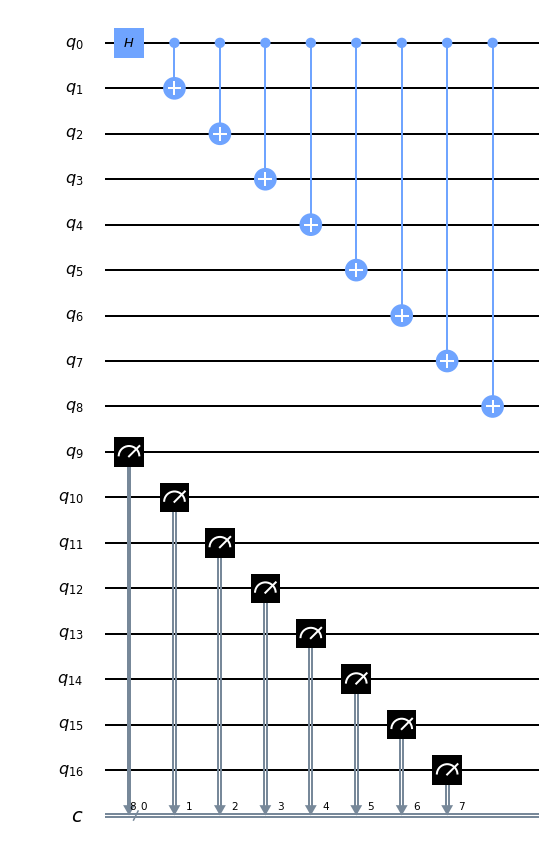

In [69]:
MinSurfWooton(qubits,N_qubit,8).draw()

In [65]:
qc = MinSurfWooton(qubits,N_qubit,8)

backend_sim = Aer.get_backend('qasm_simulator')

shots = 2048
job_sim = execute(qc, backend_sim, shots=shots)

# Grab the results from the job.
result_sim = job_sim.result()

#The dictionary counts summarize all the possible output with the number of occurence per state.
counts = result_sim.get_counts(qc)
print(counts)

{'00000100': 25, '01010100': 32, '00010100': 34, '00100000': 27, '11010000': 40, '10110110': 27, '10000100': 31, '01110010': 33, '01000000': 28, '11100110': 37, '00010000': 44, '01110110': 23, '11100000': 35, '00110100': 26, '11100010': 40, '01100100': 22, '00000010': 27, '00100100': 29, '00110110': 28, '01000100': 37, '10010000': 25, '11010100': 25, '11110000': 37, '01100110': 32, '01110100': 35, '00110000': 29, '00100010': 31, '10010100': 27, '10010010': 28, '00010110': 30, '10100000': 30, '01100010': 31, '01010010': 37, '01010000': 39, '00000110': 36, '11000010': 36, '01000110': 24, '10010110': 33, '10110000': 34, '10100100': 30, '10100110': 33, '00010010': 37, '10110010': 30, '10100010': 39, '10000000': 27, '10000110': 33, '00110010': 31, '11010110': 44, '11000000': 34, '10110100': 34, '01000010': 33, '11000100': 44, '01100000': 28, '01110000': 27, '00100110': 28, '11110100': 38, '11110110': 28, '10000010': 35, '11100100': 24, '11000110': 34, '11010010': 33, '00000000': 39, '111100

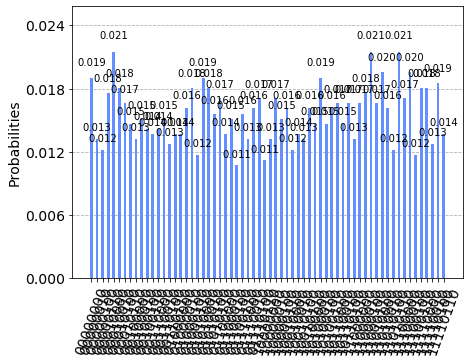

In [66]:
plot_histogram(counts)

In [67]:
qubits[16]

16